<a href="https://colab.research.google.com/github/Manomay15/Deep-Learning/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
fashion = tf.keras.datasets.fashion_mnist

In [3]:
(x_train_full, y_train_full), (x_test, y_test) = fashion.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
x_train_full.shape

(60000, 28, 28)

In [5]:
y_train_full.shape

(60000,)

In [6]:
x_test.shape

(10000, 28, 28)

In [8]:
import matplotlib.pyplot as plt

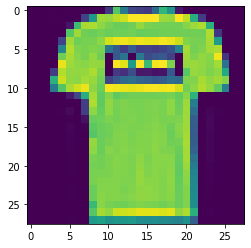

In [10]:
plt.imshow(x_train_full[1])

In [11]:
x_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [12]:
x_train, x_valid = x_train_full[:50000]/255, x_train_full[50000:]
y_train, y_valid = y_train_full[:50000], y_train_full[50000:]

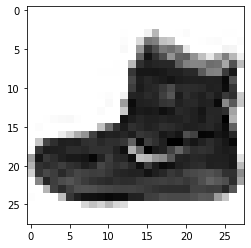

In [14]:
plt.imshow(x_train[0], cmap=plt.cm.binary)

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [23]:
optimizers = tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer=optimizers,
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [25]:
y_train

array([9, 0, 0, ..., 5, 1, 7], dtype=uint8)

In [28]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2884 - accuracy: 0.8905 - val_loss: 64.3127 - val_accuracy: 0.8301
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2738 - accuracy: 0.8966 - val_loss: 47.1490 - val_accuracy: 0.8511
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2603 - accuracy: 0.9022 - val_loss: 57.3441 - val_accuracy: 0.8527
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2510 - accuracy: 0.9057 - val_loss: 75.9136 - val_accuracy: 0.8212
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2425 - accuracy: 0.9079 - val_loss: 62.8097 - val_accuracy: 0.8305
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2330 - accuracy: 0.9109 - val_loss: 47.3667 - val_accuracy: 0.8572
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2245 - accuracy: 0.9154 - val_loss: 103.6407 - val_a

In [29]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 55.5447 - accuracy: 0.8601


[55.5446891784668, 0.8600999712944031]